In [ ]:
# 1
# 思路
# 


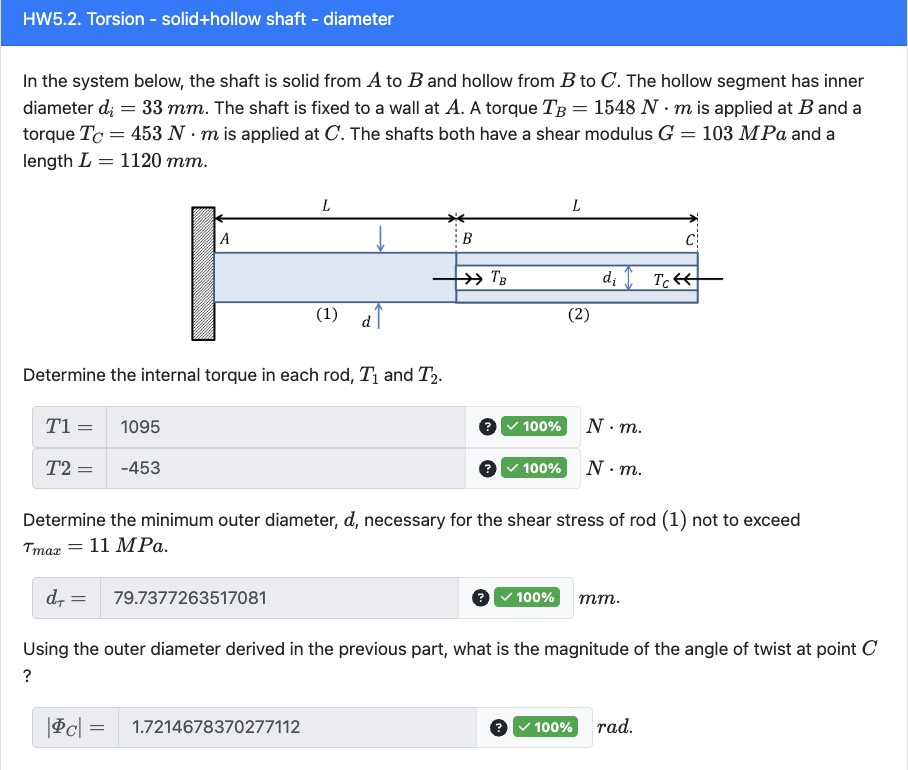

In [26]:
# 2
# 思路
# 第一问左边给的力是向左tb-tc，l1上收到的力是向右边的tb-tc为力平衡，l2受到的力向左tc，也就是-tc
# 第二问tao已知 taom=t1*d1/2/j1
# 第三问fai=t1*d1/2/j1+t2*d2/2/j2 负的直接正号就行了

# 失误 一开始J没有/16直接用的d**4
# 失误 一开始没有看清是等于taom，自以为是不伸长，gamma1+gamma2=0


from sympy import *
tb=1548
tc=453
d1=33e-3
l1=1120e-3
l2=l1
G=103e6
taom=11e6
# ===============


t1=tb-tc
t2=-tc
print(t1,t2)

d=S('d')
j1=pi/2*d**4/16
j2=pi/2*(d**4-d1**4)/16
q1=t1*d/2/j1-taom
d=solve(q1,d)[0]
print(d*1e3)


j1=pi/2*d**4/16
j2=pi/2*(d**4-d1**4)/16
fai=t1*l1/G/j1+t2*l2/G/j2
print(float(fai))



1095 -453
79.7377263517081
1.7214678370277112


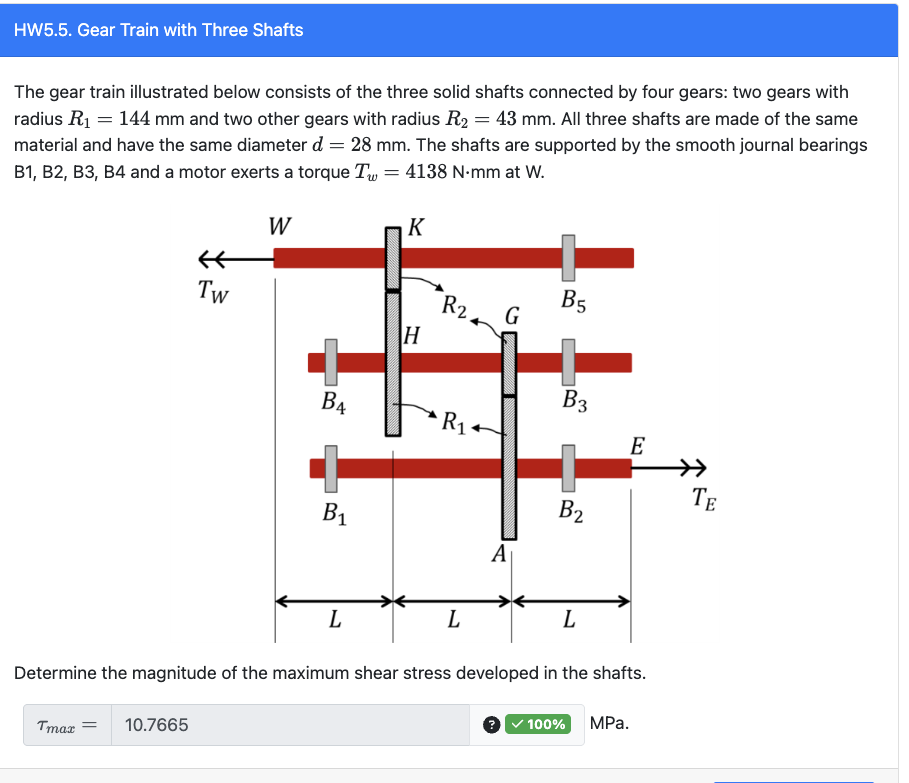

In [ ]:
# 5
# 思路


r1 = 144e-3 
r2 = 43e-3 
d = 28e-3 
tw = 4138e-3 
##########################复制内容

r=d/2

def j(r):
    return pi/32*(2*r)**4

j1=j(r1)
j2=j(r2)
j=j(d/2)

#计算最大扭矩
t3=tw*(r1/r2)*(r1/r2)


float(t3*r/j/1000000)

10.76650075764518

In [ ]:
# 1

